# Load model predictions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr

plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
sns.set_theme(style="whitegrid")
sns.set_context("notebook")  # paper, notebook, talk, and poster
import os

In [3]:
import glob
import pandas as pd


def read_files(key):
    csv_files = glob.glob(key, recursive=True)

    dataframes = []

    for file in csv_files:
        df = pd.read_csv(file)
        df['source'] = file.split("/")[-1].split("_VNBench")[0]
        dataframes.append(df)

    all_data = pd.concat(dataframes, ignore_index=True)
    return all_data


df_original = read_files('outputs/*/*/*VNBench_original_acc.csv')
df_negated = read_files('outputs/*/*/*VNBench_negated_acc.csv')

# drop "split" column and rename "source" column as Model
df_original = df_original.drop(columns=["split"])
df_negated = df_negated.drop(columns=["split"])
df_original = df_original.rename(columns={"source": "Model"})
df_negated = df_negated.rename(columns={"source": "Model"})

category_mapping = {
    "General": ["A-OKVQA", "VQAv2", "SEEDBench", "OKVQA", "MMStar", "VizWiz", "MMVet"],
    "Doc & Chart": ["DocVQA", "ChartQA", "InfoVQA", "TableVQABench", "AI2D"],
    "Reasoning": ["MathVista", "MMMU", "MathVision", "GQA", "RealWorldQA", "ScienceQA"],
    "OCR": ["OCRVQA", "TextVQA"]
}

# compute the mean of each category based on the list of columns and add these new columns
for category, datasets in category_mapping.items():
    df_original[category] = df_original[datasets].mean(axis=1)
    df_negated[category] = df_negated[datasets].mean(axis=1)


model_names_map = {
    'GPT4o_20240806': 'GPT-4o',
    'GPT4o_MINI': 'GPT-4o-Mini',
    'Qwen2-VL-2B-Instruct': 'Qwen2-VL-2B',
    'Qwen2-VL-7B-Instruct': 'Qwen2-VL-7B',
    'Qwen2-VL-72B-Instruct': 'Qwen2-VL-72B',
    'molmo-72B-0924': 'Molmo-72B',
    'molmo-7B-D-0924': 'Molmo-7B-D',
    'molmo-7B-O-0924': 'Molmo-7B-O',
    'molmoE-1B-0924': 'MolmoE-1B',
    'VILA1.5-40b': 'VILA1.5-40B',
    'VILA1.5-3b': 'VILA1.5-3B',
    'VILA1.5-13b': 'VILA1.5-13B',
    'Llama-3-VILA1.5-8b': 'VILA1.5-8B',
    'cambrian_8b': 'Cambrian-8B',
    'cambrian_13b': 'Cambrian-13B',
    'cambrian_34b': 'Cambrian-34B',
    'chameleon_7b': 'Chameleon-7B',
    'chameleon_30b': 'Chameleon-30B',
    'cogvlm-chat': 'CogVLM-17B',
    'cogvlm2-llama3-chat-19B': 'CogVLM2-19B',
    'deepseek_vl_1.3b': 'DeepSeek-VL-1.3B',
    'deepseek_vl_7b': 'DeepSeek-VL-7B',
    'idefics2_8b': 'Idefics2-8B',
    'paligemma-3b-mix-448': 'PaliGemma-3B',
    'llava_v1.5_7b': 'LLaVA-1.5-7B',
    'llava_v1.5_13b': 'LLaVA-1.5-13B',
    'instructblip_7b': 'InstructBLIP-7B',
    'instructblip_13b': 'InstructBLIP-13B',
}

df_original = df_original.rename(columns={'Overall': 'Avg.'})
df_original = df_original.sort_values(by='Model').reset_index(drop=True)
model_names = df_original['Model'].tolist()

df_negated = df_negated.rename(columns={'Overall': 'Avg.'})
df_negated = df_negated.sort_values(by='Model').reset_index(drop=True)
model_names2 = df_negated['Model'].tolist()

assert model_names == model_names2, "The model names in both DataFrames do not match."

In [12]:
df_original

,Avg.,A-OKVQA,AI2D,ChartQA,DocVQA,GQA,InfoVQA,MMMU,MMStar,MMVet,...,ScienceQA,TableVQABench,TextVQA,VQAv2,VizWiz,Model,General,Doc & Chart,Reasoning,OCR
0,0.785201,0.886022,0.766454,0.724490,0.725714,0.892857,0.640449,0.633333,0.677165,0.788820,...,0.846939,0.613187,0.867882,0.926503,0.894231,Llama-3-VILA1.5-8b,0.852580,0.694059,0.711526,0.910257
1,0.853639,0.935484,0.817410,0.854592,0.985714,0.926339,0.826966,0.675000,0.687664,0.863354,...,0.851020,0.756044,0.974943,0.951002,0.929487,Qwen2-VL-2B-Instruct,0.886498,0.848145,0.747337,0.961156
2,0.921534,0.963441,0.923567,0.936224,0.997143,0.939732,0.966292,0.833333,0.834646,0.925466,...,0.916327,0.918681,0.995444,0.968820,0.961538,Qwen2-VL-72B-Instruct,0.935941,0.948382,0.833787,0.989827
3,0.888332,0.937634,0.878981,0.887755,0.994286,0.930804,0.876404,0.783333,0.792651,0.894410,...,0.918367,0.832967,0.981777,0.971047,0.945513,Qwen2-VL-7B-Instruct,0.912698,0.894079,0.797829,0.972467
4,0.796449,0.898925,0.823779,0.744898,0.720000,0.910714,0.633708,0.700000,0.695538,0.770186,...,0.840816,0.593407,0.890661,0.922049,0.887821,VILA1.5-13b,0.856727,0.703158,0.736568,0.916383
5,0.760808,0.873118,0.732484,0.691327,0.728571,0.886161,0.559551,0.600000,0.650919,0.788820,...,0.818367,0.589011,0.863326,0.897550,0.891026,VILA1.5-3b,0.839466,0.660189,0.679681,0.881663
6,0.857162,0.933333,0.834395,0.887755,0.880000,0.939732,0.743820,0.787500,0.729659,0.844720,...,0.906122,0.727473,0.947608,0.933185,0.948718,VILA1.5-40b,0.894283,0.814689,0.785711,0.963278
7,0.835886,0.929032,0.825902,0.841837,0.908571,0.899554,0.710112,0.650000,0.698163,0.832298,...,0.865306,0.740659,0.954442,0.942094,0.919872,cambrian_13b,0.876749,0.805416,0.734524,0.958800
8,0.873696,0.948387,0.868365,0.882653,0.940000,0.926339,0.802247,0.745833,0.737533,0.863354,...,0.926531,0.758242,0.958998,0.944321,0.945513,cambrian_34b,0.900055,0.850301,0.803319,0.966341
9,0.837918,0.931183,0.845011,0.841837,0.882857,0.908482,0.737079,0.695833,0.721785,0.782609,...,0.840816,0.740659,0.947608,0.953229,0.923077,cambrian_8b,0.876353,0.809488,0.739980,0.934330


In [11]:
df_negated

,Avg.,A-OKVQA,AI2D,ChartQA,DocVQA,GQA,InfoVQA,MMMU,MMStar,MMVet,...,ScienceQA,TableVQABench,TextVQA,VQAv2,VizWiz,Model,General,Doc & Chart,Reasoning,OCR
0,0.561729,0.518280,0.615711,0.487245,0.477143,0.515625,0.483146,0.537500,0.559055,0.465839,...,0.826531,0.463736,0.646925,0.550111,0.653846,Llama-3-VILA1.5-8b,0.566994,0.505396,0.533191,0.683989
1,0.534354,0.432258,0.566879,0.415816,0.491429,0.433036,0.433708,0.512500,0.564304,0.403727,...,0.789796,0.402198,0.697039,0.541203,0.471154,Qwen2-VL-2B-Instruct,0.518883,0.462006,0.523135,0.780098
2,0.726657,0.756989,0.821656,0.668367,0.897143,0.709821,0.600000,0.691667,0.713911,0.490683,...,0.875510,0.630769,0.872437,0.712695,0.737179,Qwen2-VL-72B-Instruct,0.716519,0.723587,0.640668,0.917798
3,0.572300,0.445161,0.571125,0.454082,0.677143,0.415179,0.496629,0.562500,0.577428,0.503106,...,0.791837,0.452747,0.697039,0.608018,0.653846,Qwen2-VL-7B-Instruct,0.588378,0.530345,0.518225,0.819572
4,0.511858,0.453763,0.520170,0.456633,0.431429,0.439732,0.449438,0.525000,0.522310,0.378882,...,0.732653,0.523077,0.507973,0.565702,0.592949,VILA1.5-13b,0.514471,0.476149,0.487466,0.625039
5,0.447622,0.346237,0.513800,0.410714,0.428571,0.390625,0.474157,0.516667,0.530184,0.360248,...,0.548980,0.501099,0.496583,0.354120,0.352564,VILA1.5-3b,0.395927,0.465668,0.471248,0.519344
6,0.705109,0.752688,0.717622,0.571429,0.728571,0.787946,0.507865,0.670833,0.640420,0.484472,...,0.902041,0.562637,0.847380,0.757238,0.791667,VILA1.5-40b,0.731675,0.617625,0.630301,0.902638
7,0.503185,0.436559,0.543524,0.446429,0.445714,0.377232,0.429213,0.495833,0.522310,0.360248,...,0.781633,0.421978,0.505695,0.570156,0.474359,cambrian_13b,0.500513,0.457372,0.489017,0.692321
8,0.598591,0.602151,0.670913,0.461735,0.454286,0.636161,0.458427,0.562500,0.574803,0.428571,...,0.789796,0.430769,0.687927,0.692650,0.727564,cambrian_34b,0.645816,0.495226,0.531979,0.815016
9,0.556851,0.511828,0.632696,0.482143,0.468571,0.504464,0.465169,0.483333,0.574803,0.434783,...,0.808163,0.457143,0.635535,0.583519,0.647436,cambrian_8b,0.572296,0.501144,0.505941,0.717768


# Plot scaling curves

In [7]:
import matplotlib.ticker as ticker

model_scale = {
    "cambrian_8b": 8,
    "cambrian_13b": 13,
    "cambrian_34b": 34,
    "Qwen2-VL-2B-Instruct": 2,
    "Qwen2-VL-7B-Instruct": 7,
    "Qwen2-VL-72B-Instruct": 72,
    "VILA1.5-3b": 3,
    "Llama-3-VILA1.5-8b": 8,
    "VILA1.5-13b": 13,
    "VILA1.5-40b": 40,
    "deepseek_vl_1.3b": 1.3,
    "deepseek_vl_7b": 7,
    "chameleon_7b": 7,
    "chameleon_30b": 30,
    "llava_v1.5_7b": 7,
    "llava_v1.5_13b": 13,
    "instructblip_7b": 7,
    "instructblip_13b": 13,
    "molmoE-1B-0924": 1,
    "molmo-7B-O-0924": 7,
    "molmo-72B-0924": 72,
}

def plot_model_performance(df, category):
    fig, ax = plt.subplots(figsize=(5,3))

    families = {
        'VILA': 'o',          # Circle
        'Cambrian': '^',      # Triangle Up
        'InstructBLIP': 's',  # Square
        'Chameleon': 'P',     # Plus filled
        'DeepSeek': '*',      # Star
        'Qwen2-VL': 'X',      # X
        'LLaVA': 'D',         # Diamond
        'Molmo': 'p',      # Pentagram
    }
    colors = {
        'VILA': '#1f77b4',
        'Cambrian': '#ff7f0e',
        'InstructBLIP': '#2ca02c',
        'Chameleon': '#d62728',
        'DeepSeek': '#9467bd',
        'Qwen2-VL': '#8c564b',
        'LLaVA': '#e377c2',
        'Molmo': '#7f7f7f',
    }

    df['Scale'] = df['Model'].map(model_scale)

    for key, marker in families.items():
        color = colors[key]
        subset = df[df['Model'].str.contains(key, case=False)].copy()
        if subset.empty:
            continue
        subset.sort_values('Scale', inplace=True)
        
        ax.plot(subset['Scale'], subset[category] * 100, linestyle='--', color=color, alpha=0.5)
        
        ax.scatter(subset['Scale'], subset[category] * 100, marker=marker, color=color, label=key, alpha=0.7)

    ax.set_xlabel('Model Size (Billion)', fontsize=8)
    ax.set_xscale('log', base=2)
    ax.xaxis.set_major_locator(ticker.LogLocator(base=2.0, subs=[], numticks=10))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.set_ylabel(f'Accuracy (%)', fontsize=8)
    ax.set_title(f'{category} Performance', fontsize=8)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='best', fontsize=6)
    ax.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'scalings/{category}_performance_original.png', dpi=300, bbox_inches='tight')

/tmp/user/19662/ipykernel_3978113/3549346133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Scale'] = df['Model'].map(model_scale)


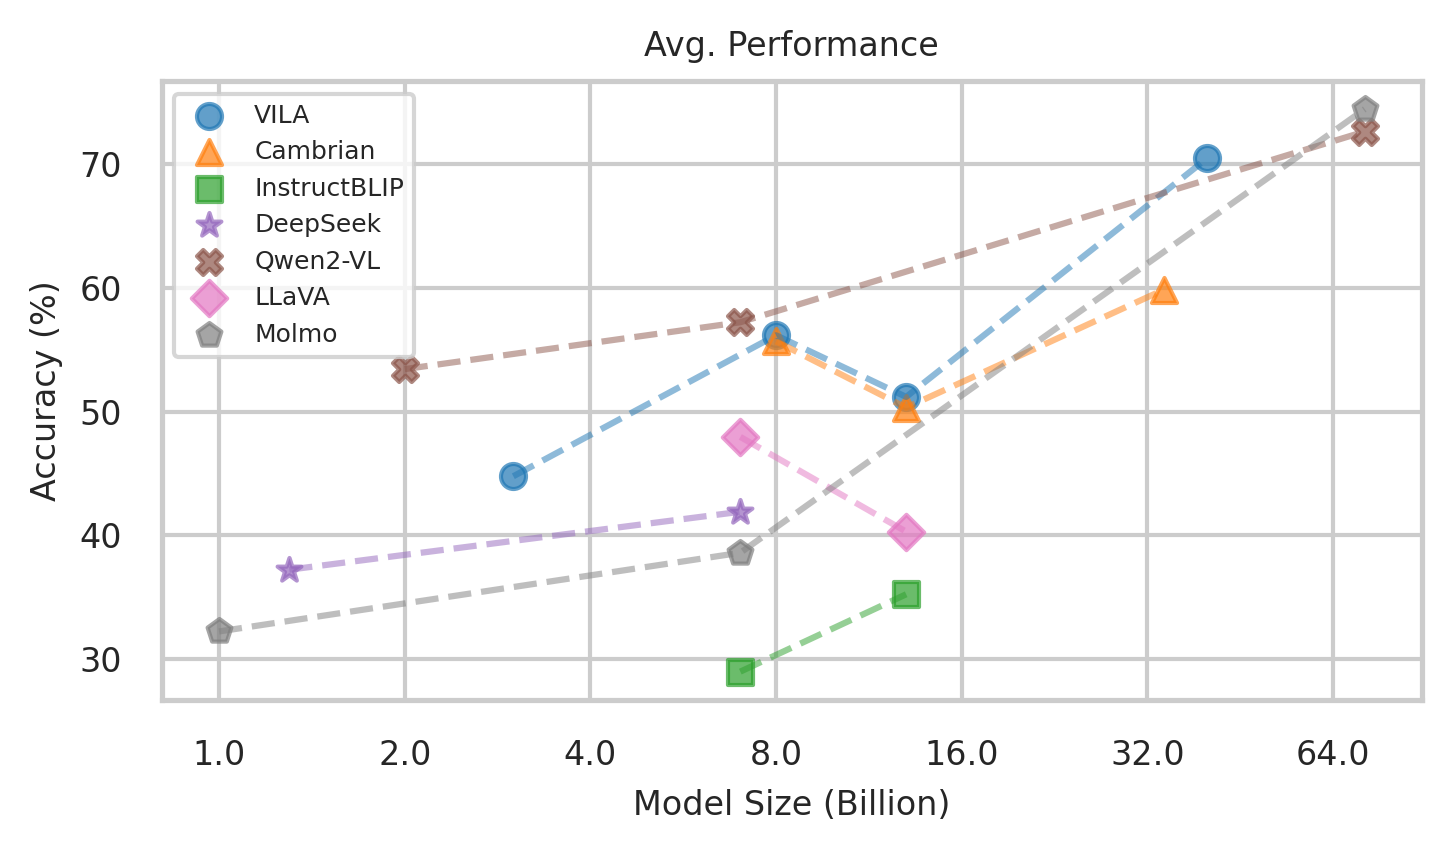

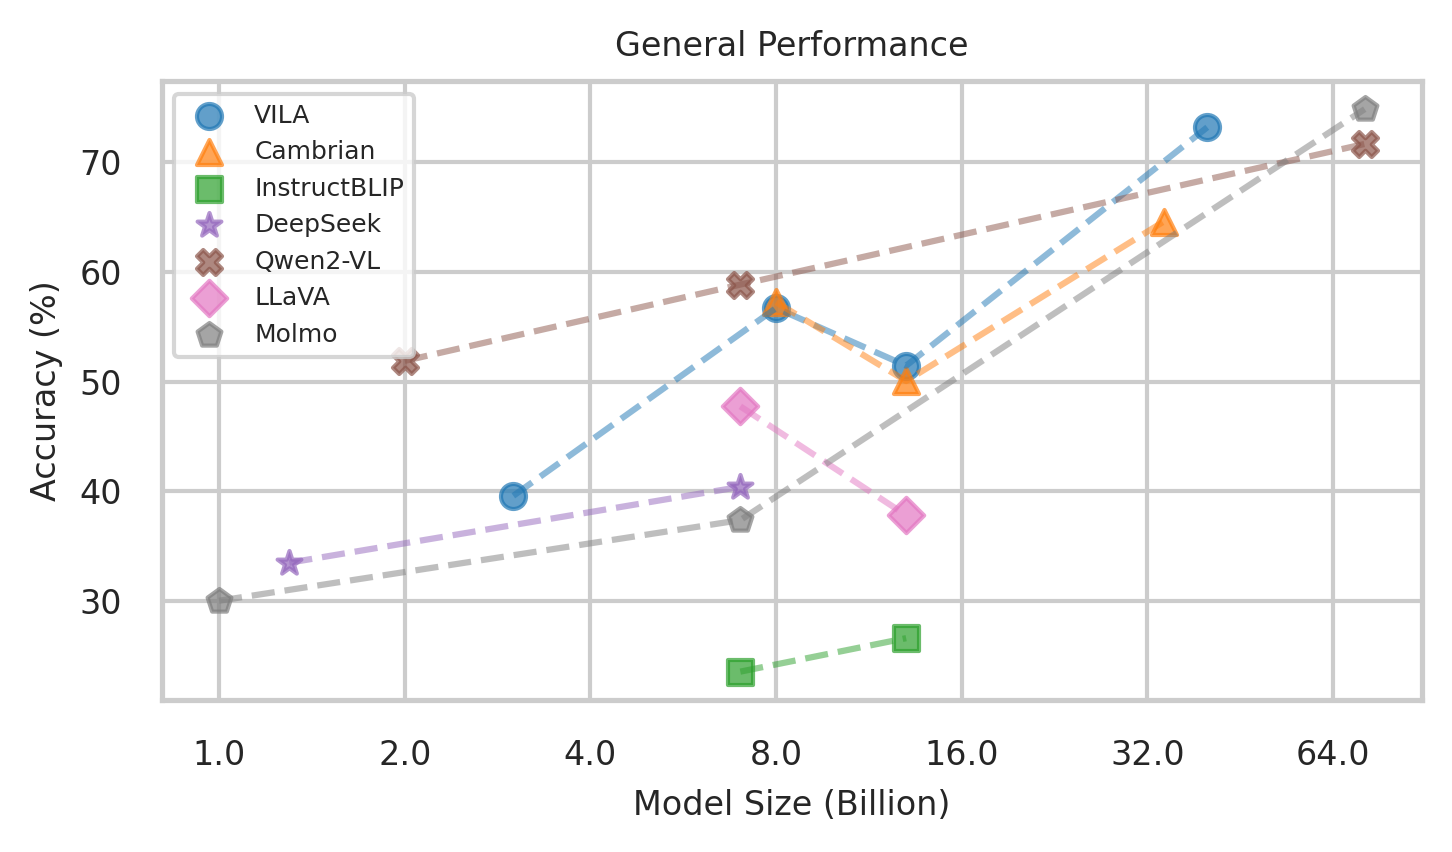

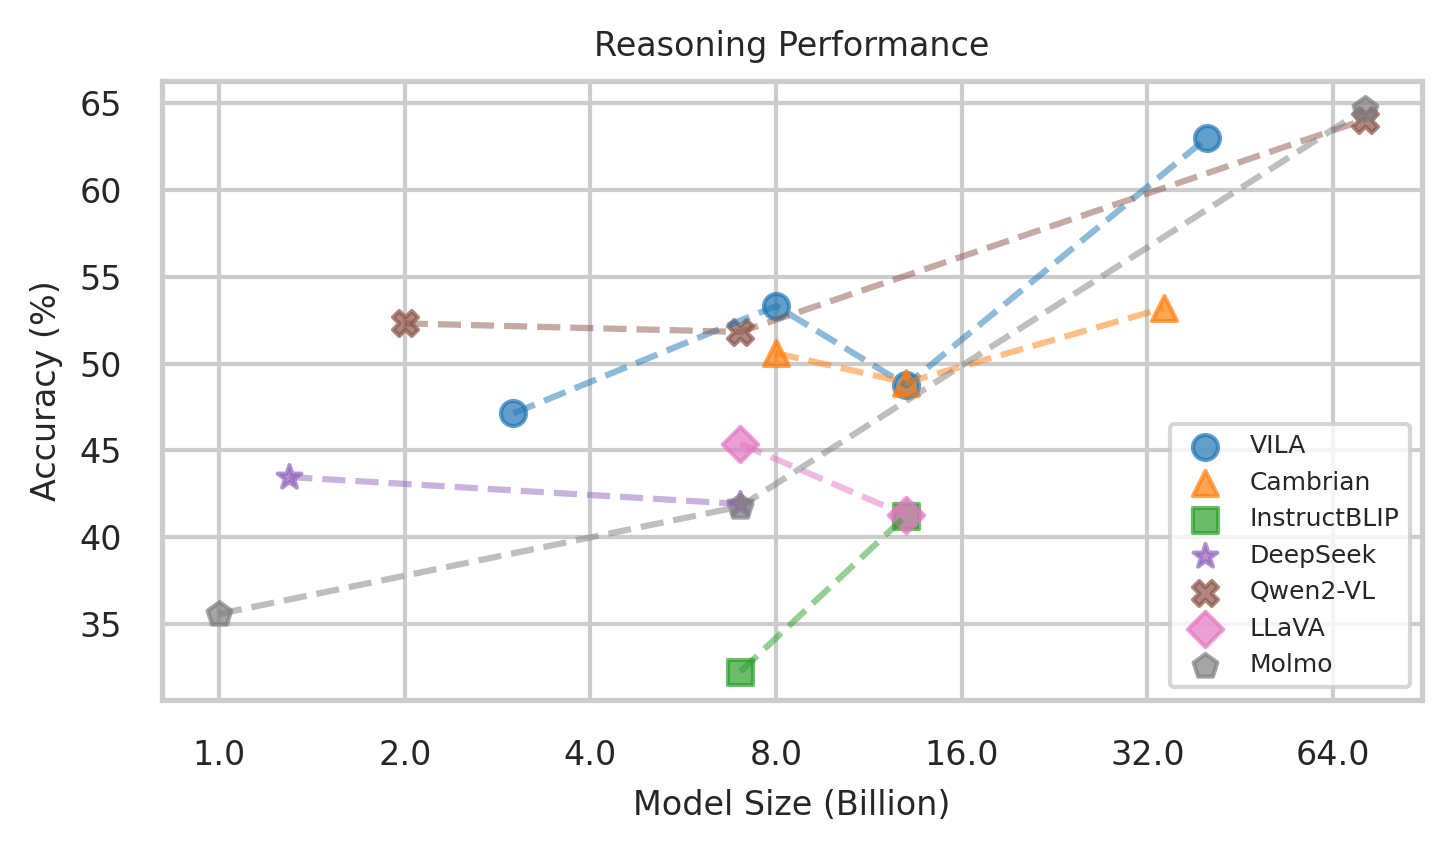

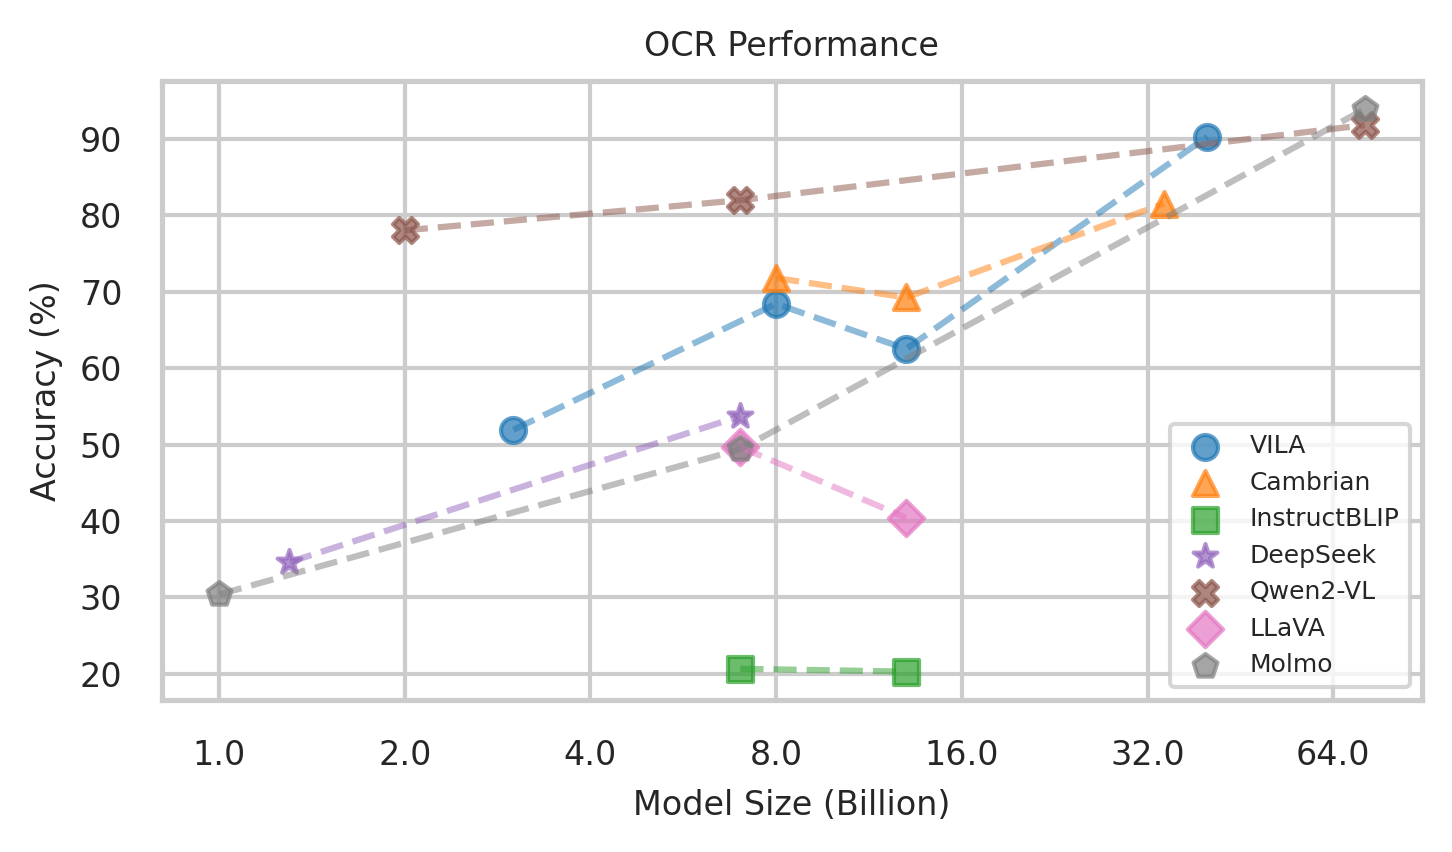

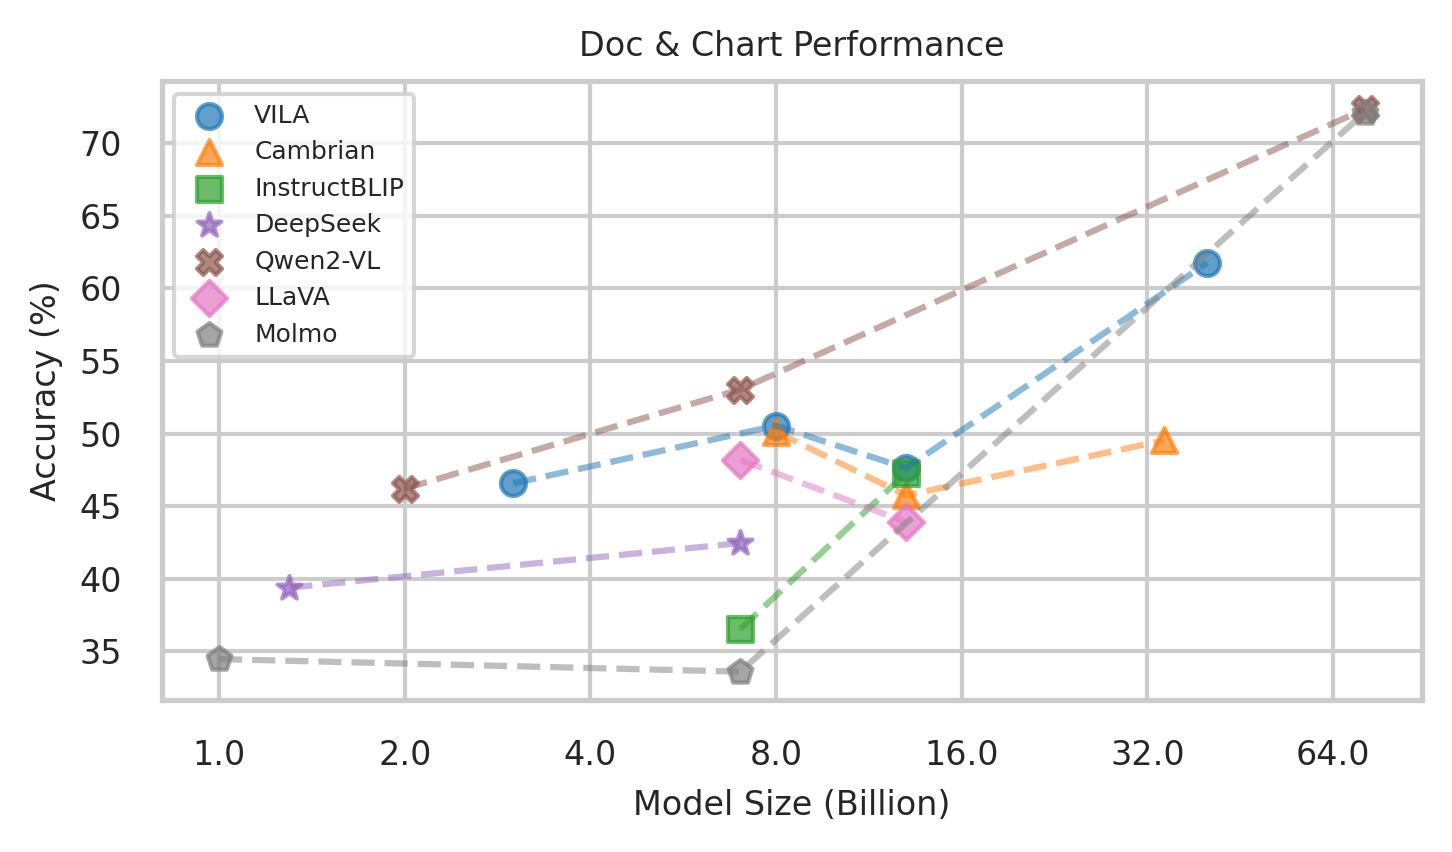

In [8]:
# only select the models that are in the model_scale
df = df_negated
df = df[df["Model"].isin(model_scale.keys())]
df['Scale'] = df['Model'].map(model_scale)

# drop model chameleon_7b and chameleon_30b
df = df[df['Model'] != 'chameleon_7b']
df = df[df['Model'] != 'chameleon_30b']

plot_model_performance(df, 'Avg.')
plot_model_performance(df, 'General')
plot_model_performance(df, 'Reasoning')
plot_model_performance(df, 'OCR')
plot_model_performance(df, 'Doc & Chart')